# **Setup**

* https://www.youtube.com/watch?v=jmX4FOUEfgU

In [1]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt 

# **Optimization**

In [3]:
from scipy.optimize import minimize

# Get Documentation
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

## **Equation 01**
Minimize $f(x) = (x-3)^2$

In [9]:
# Define Function
def f(x):
    return (x-3)**2

# Minimization Problem
result = minimize(fun=f,x0=2)

# Result
# Minimum Input Value
print('Min. Value Of Function: ',result.fun)
print('Optimal Input Parameter Value: ',result.x,'\n')
result

Min. Value Of Function:  5.551437397369767e-17
Optimal Input Parameter Value:  [2.99999999] 



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

## **Equation 02**

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<!-- 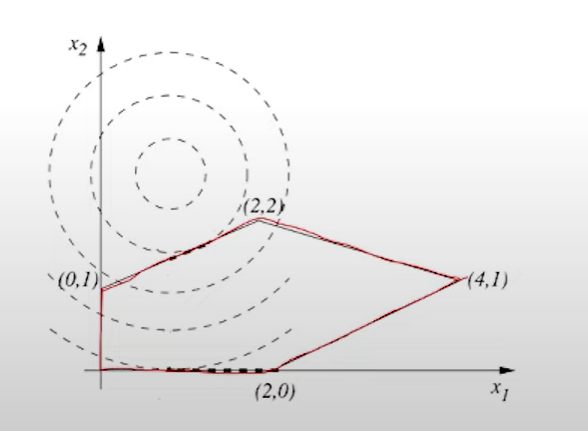 -->

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [10]:
# Define Function
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2

# Check Function Value
f([1,2])

0.25

In [11]:
# Define Constraints
cons = ({'type':'ineq','fun': lambda x: x[0] - 2*x[1] + 2},
        {'type':'ineq','fun': lambda x: -x[0] - 2*x[1] + 6},
        {'type':'ineq','fun': lambda x: -x[0] + 2*x[1] + 2})

bnds = ((0,None),(0,None))

result = minimize(f,(2,0),constraints=cons,bounds=bnds)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

# **Interpolation**

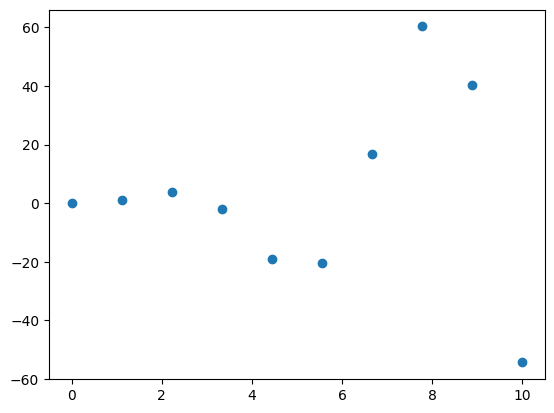

In [12]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

## **Linear Interpolation**

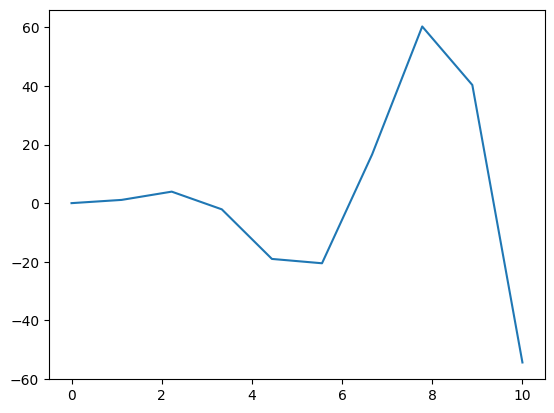

In [14]:
from scipy.interpolate import interp1d

# Define Interpolation Function
f = interp1d(x,y,kind='linear')

# Dense Input
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense,y_dense)

## **Cubic Interpolation**

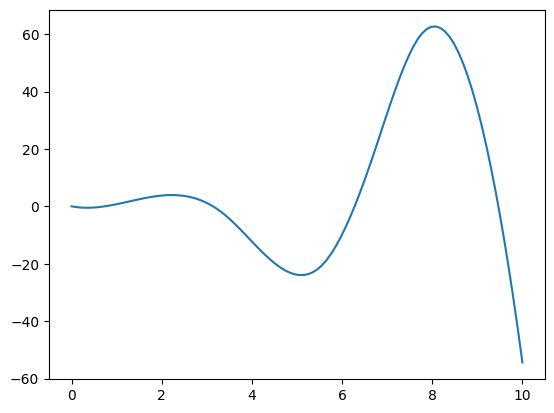

In [15]:
from scipy.interpolate import interp1d

# Define Interpolation Function
f = interp1d(x,y,kind='cubic')

# Dense Input
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense,y_dense)

# **Curve Fitting**

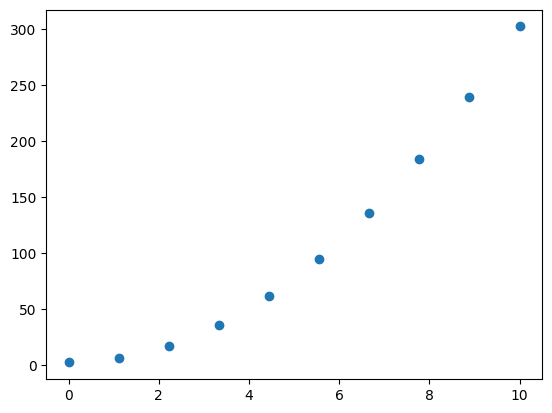

In [16]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data,y_data)

## **Equation 01**
Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [17]:
from scipy.optimize import curve_fit

# Define Fuction
def f(x,a,b):
    return a*x**2 + b

In [19]:
popt, pcov = curve_fit(f,x_data,y_data,p0=(1,1))

# Optimal Curve Parameters
print('Optimal Curve Parameters: ',popt)

# Covariance
print('Parameter Covariance: ',pcov)

Optimal Curve Parameters:  [3. 2.]
Parameter Covariance:  [[ 4.13297331e-34 -1.45419433e-32]
 [-1.45419433e-32  9.65872308e-31]]


## **Equation 02**
The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

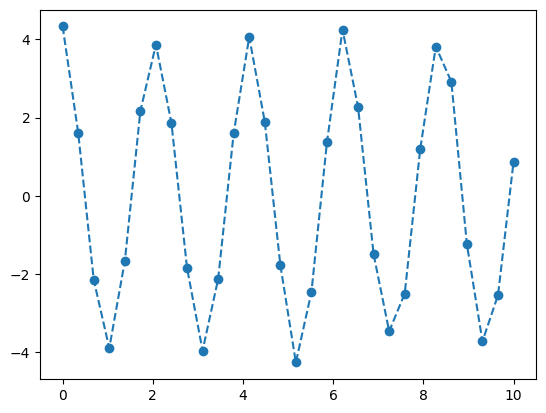

In [22]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

plt.plot(t_data,y_data,'o--')

In [37]:
# Define Function
def f(t,A,w,phi):
    return A*np.cos(w*t+phi)

# Curve Fitting
popt, pcov = curve_fit(f,t_data,y_data,p0=(4,np.pi,0))      # Important To Get Right Guess Values

# Result
print(popt)
A, w, phi = popt

[3.94836219 2.99899521 0.10411352]


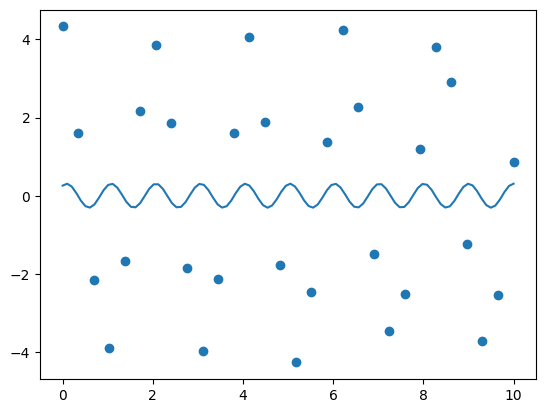

In [36]:
# Data Points From Curve Fitting
t = np.linspace(0,10,100)
y = f(t,A,w,phi)

# Compare Actual Data & Predicted Curve
plt.scatter(t_data,y_data)
plt.plot(t,y)

In [29]:
# Predicted Value
print('Predicted Value w: ',w)

Predicted Value w:  2.998995205451252


In [31]:
# Error In Curve Parameter Prediction 
# Covariance Matrix 
# Shows Relationship Between All The Predicted Parameters
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [34]:
# Parameter Variance 
print('Parameter Variance: ',np.diag(pcov))

# Parameter Std. Deviation 
print('Parameter Std. Deviation: ',np.sqrt(np.diag(pcov)))

Parameter Variance:  [2.61882717e-03 1.85637335e-05 6.63423791e-04]
Parameter Std. Deviation:  [0.05117448 0.00430857 0.02575701]


# **Special Functions**

## **Legendre Function**

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

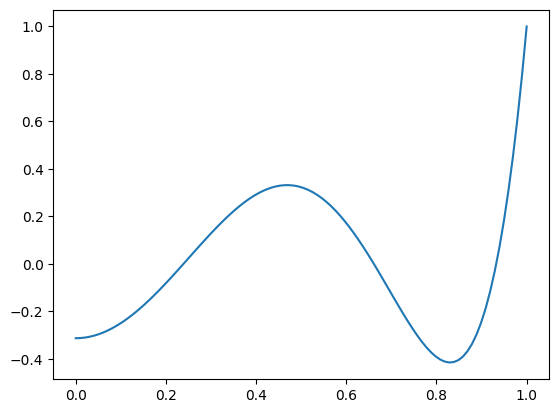

In [42]:
from scipy.special import legendre

x = np.linspace(0,1,100)
y = legendre(6)(x)  # Coeff l=6

# Plot
plt.plot(x,y)

## **Bessel Function**
Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

* Laplace's Equation in Polar Coordinates

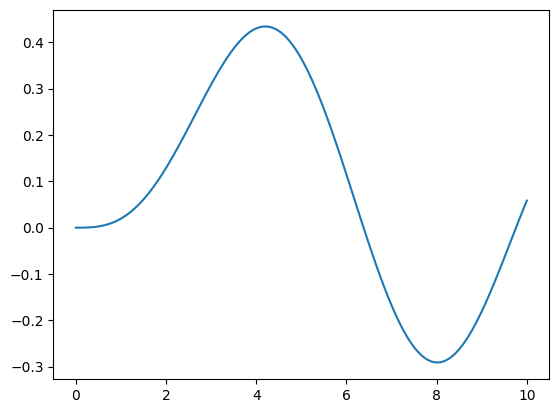

In [43]:
from scipy.special import jv

x = np.linspace(0,10,100)
y = jv(3,x)

# Plot
plt.plot(x,y)

# **Calculus**

## **Differentiation**

C:\Users\aksha\AppData\Local\Temp\ipykernel_30584\332633823.py:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x,derivative(f,x,dx=1e-6,n=1),c='Blue') # First Order Derivative
C:\Users\aksha\AppData\Local\Temp\ipykernel_30584\332633823.py:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x,derivative(f,x,dx=1e-6,n=2),c='Yellow') # Second Order Derivative


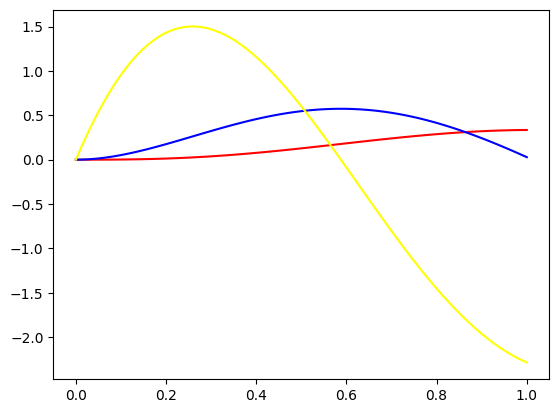

In [52]:
from scipy.misc import derivative

# Define Function
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

# Specify Input Data
x = np.linspace(0,1,100)
y = f(x)

# Plot 
plt.plot(x,f(x),c='Red')    # Plot Function
plt.plot(x,derivative(f,x,dx=1e-6,n=1),c='Blue') # First Order Derivative
plt.plot(x,derivative(f,x,dx=1e-6,n=2),c='Yellow') # Second Order Derivative

## **Single Integration**

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [53]:
from scipy.integrate import quad

integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)

# Integration
integral, integral_error = quad(integrand,0,1)

# Output
print('Integral: ',integral)
print('Integral_Error: ',integral_error)

Integral:  0.10246777930717413
Integral_Error:  1.1376208786903388e-15


## **Double Integration**
$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [55]:
from scipy.integrate import dblquad

# Define Function
integrand = lambda x,y: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2

# Integration
integral, integral_error = dblquad(integrand,0,1,lwr_y,upr_y)

# Output
print('Integral: ',integral)
print('Integral_Error: ',integral_error)

Integral:  0.315802507240474
Integral_Error:  1.5634600713498928e-14


## **n-Order Integration**

In [57]:
from scipy.integrate import nquad

nquad?

Signature: nquad(func, ranges, args=None, opts=None, full_output=False)
Docstring:
Integration over multiple variables.

Wraps `quad` to enable integration over multiple variables.
Various options allow improved integration of discontinuous functions, as
well as the use of weighted integration, and generally finer control of the
integration process.

Parameters
----------
func : {callable, scipy.LowLevelCallable}
    The function to be integrated. Has arguments of ``x0, ... xn``,
    ``t0, ... tm``, where integration is carried out over ``x0, ... xn``,
    which must be floats.  Where ``t0, ... tm`` are extra arguments
    passed in args.
    Function signature should be ``func(x0, x1, ..., xn, t0, t1, ..., tm)``.
    Integration is carried out in order.  That is, integration over ``x0``
    is the innermost integral, and ``xn`` is the outermost.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

     

# **Differential Equation**

## **First Order ODE**
Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [59]:
from scipy.integrate import odeint

# Define Equation
def dvdt(v,t):
    return 3*v**2 - 5

# Initial Value
v0 = 0

t = np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)

In [60]:
# Check Solution
print(sol.shape)
sol

(100, 1)


array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

In [61]:
# Transpose The Solution Array
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

In [62]:
# Get First Element Of Solution
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

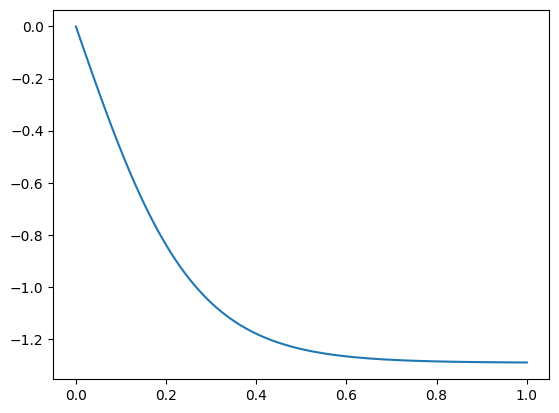

In [63]:
# Plot 
plt.plot(t,sol.T[0])

# **Fourier Transform**

# **Linear Algebra**

# **Statistics**

## **Beta Distribution**

Mean:  0.44642857142857145
Variance:  0.03744395485466914
Skewness:  0.14570980275128334
Kurtosis:  -0.6695305405298693


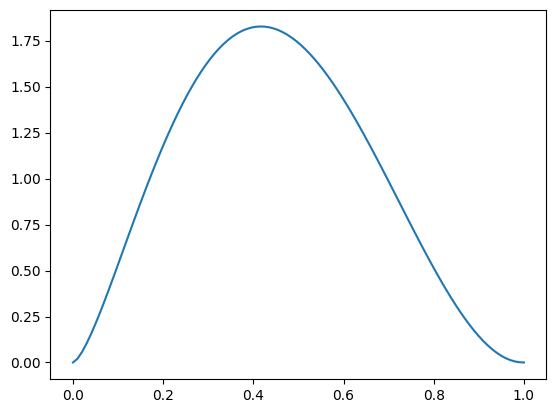

In [75]:
from scipy.stats import beta

a,b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a,b,moments='mvsk')

# Distribution Stats
print('Mean: ',mean)
print('Variance: ',var)
print('Skewness: ',skew)
print('Kurtosis: ',kurt)

# Plot
x = np.linspace(beta.ppf(0,a,b),beta.ppf(1,a,b),100)
plt.plot(x,beta.pdf(x,a,b))

In [67]:
# Documentation For PDF
beta.pdf?

Signature: beta.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      c:\users\aksha\appdata\local\programs\python\python311\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method

In [68]:
beta.ppf(0.01,a,b)

0.0705542633553964

In [69]:
beta.ppf(0.99,a,b)

0.871845893864339

## **Normal Distribution**

Mean:  1.0
Variance:  4.0


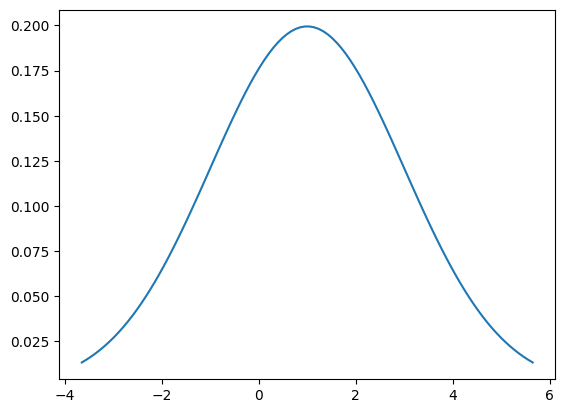

In [78]:
from scipy.stats import norm

mu = 1
sigma = 2

mean, var = norm.stats(loc=mu,scale=sigma,moments='mv')

# Get Distribution Stats
print('Mean: ',mean)
print('Variance: ',var)

# Plot
x = np.linspace(norm.ppf(0.01,mu,sigma),norm.ppf(.99,mu,sigma),100)
plt.plot(x,norm.pdf(x,mu,sigma))